In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dataset_path = "/kaggle/input/ovarian-cancer-classification-dataset/Test_Images"

In [3]:
data = []

for label in os.listdir(dataset_path):
    
    sub_dir = os.path.join(dataset_path, label)
    
    if os.path.isdir(sub_dir):
    
        for file_name in os.listdir(sub_dir):
            
            file_path = os.path.join(sub_dir, file_name)
            
            data.append([file_path, label])

df = pd.DataFrame(data, columns=['file_path', 'label'])

In [4]:
df.head()

,file_path,label
0,/kaggle/input/ovarian-cancer-classification-da...,LGSC
1,/kaggle/input/ovarian-cancer-classification-da...,LGSC
2,/kaggle/input/ovarian-cancer-classification-da...,LGSC
3,/kaggle/input/ovarian-cancer-classification-da...,LGSC
4,/kaggle/input/ovarian-cancer-classification-da...,LGSC


In [5]:
df.tail()

,file_path,label
3077,/kaggle/input/ovarian-cancer-classification-da...,HGSC
3078,/kaggle/input/ovarian-cancer-classification-da...,HGSC
3079,/kaggle/input/ovarian-cancer-classification-da...,HGSC
3080,/kaggle/input/ovarian-cancer-classification-da...,HGSC
3081,/kaggle/input/ovarian-cancer-classification-da...,HGSC


In [6]:
df.shape

(3082, 2)

In [7]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

file_path    0
label        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  3082 non-null   object
 1   label      3082 non-null   object
dtypes: object(2)
memory usage: 48.3+ KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df['label'].unique()

array(['LGSC', 'EC', 'CC', 'MC', 'HGSC'], dtype=object)

In [13]:
df['label'].value_counts()

label
HGSC    1188
EC       733
CC       551
MC       323
LGSC     287
Name: count, dtype: int64

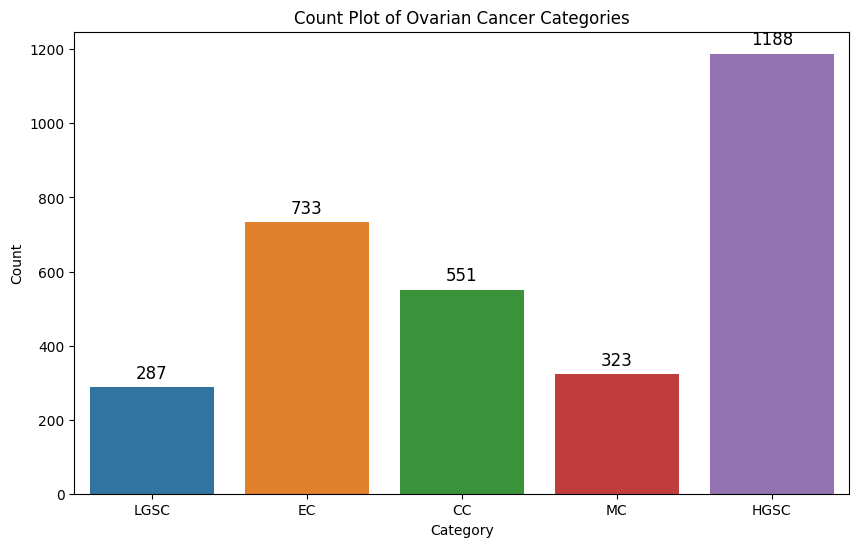

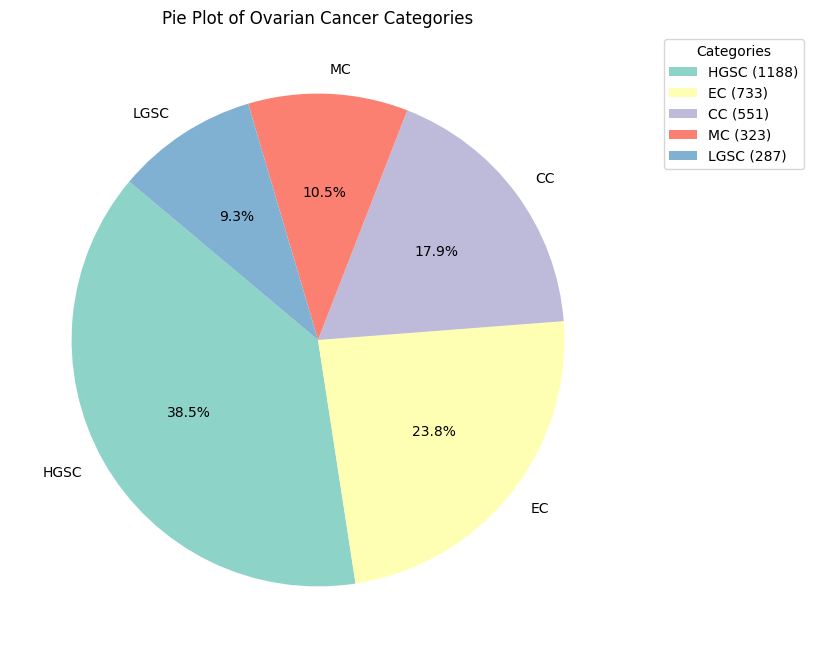

In [14]:
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='label', data=df)
plt.title("Count Plot of Ovarian Cancer Categories")
plt.xlabel("Category")
plt.ylabel("Count")

for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

plt.figure(figsize=(8, 8))
category_counts = df['label'].value_counts()
pie_plot = category_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Pie Plot of Ovarian Cancer Categories")
plt.ylabel("")  

labels_with_counts = [f'{label} ({count})' for label, count in zip(category_counts.index, category_counts.values)]
plt.legend(labels_with_counts, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

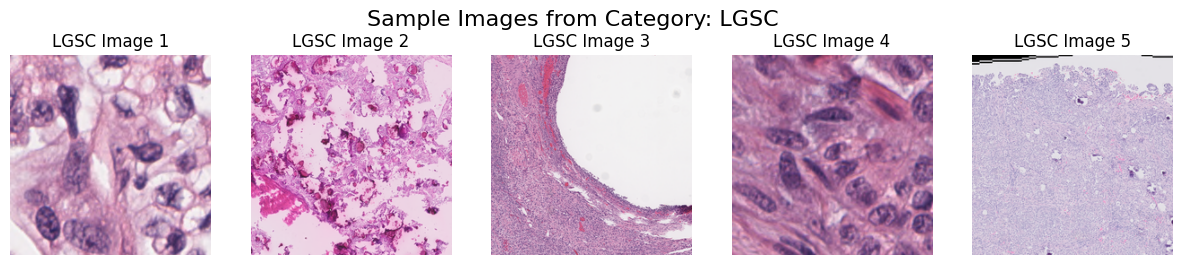

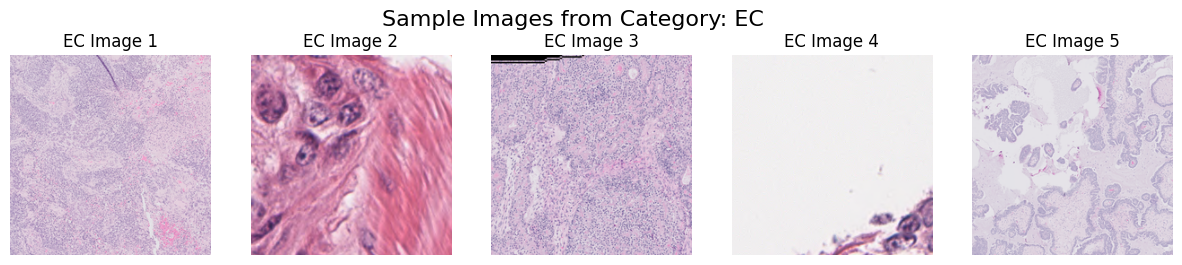

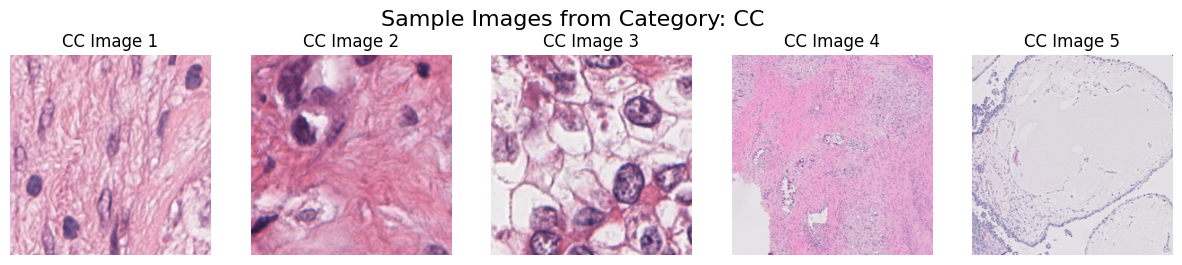

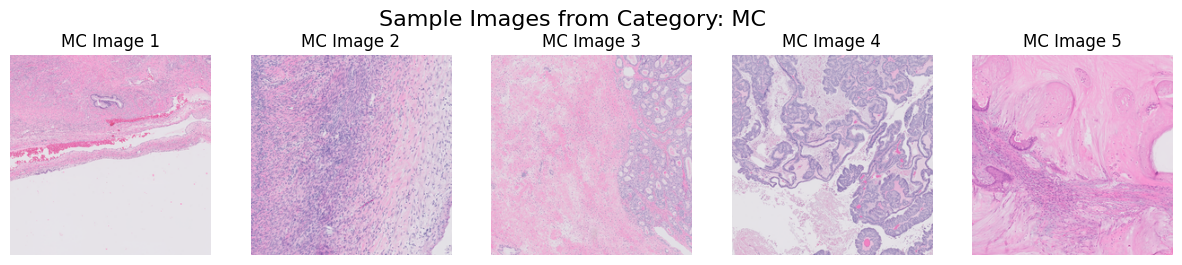

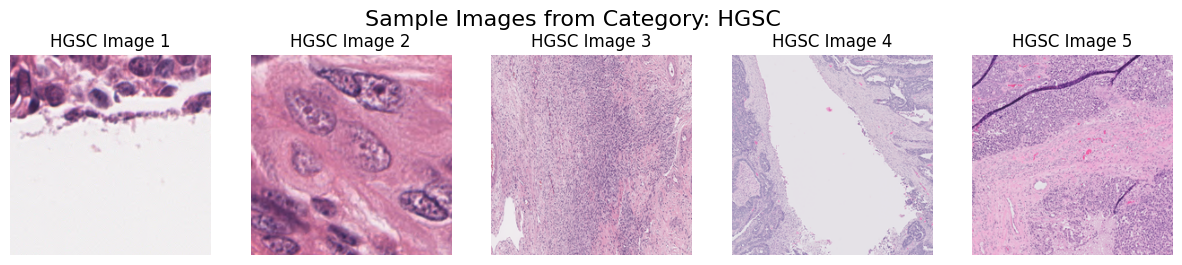

In [15]:
from PIL import Image

categories = os.listdir(dataset_path)

num_images = 5

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)[:num_images]  

    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Sample Images from Category: {category}', fontsize=16)

    for i, image_name in enumerate(images):

        image_path = os.path.join(category_path, image_name)
        img = Image.open(image_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{category} Image {i+1}')

    plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [18]:
df = df[['file_path', 'category_encoded']]

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['category_encoded'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['category_encoded'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
3    1188
1    1188
0    1188
4    1188
2    1188
Name: count, dtype: int64


In [23]:
df_resampled

,file_path,category_encoded
0,/kaggle/input/ovarian-cancer-classification-da...,3
1,/kaggle/input/ovarian-cancer-classification-da...,3
2,/kaggle/input/ovarian-cancer-classification-da...,3
3,/kaggle/input/ovarian-cancer-classification-da...,3
4,/kaggle/input/ovarian-cancer-classification-da...,3
...,...,...
5935,/kaggle/input/ovarian-cancer-classification-da...,4
5936,/kaggle/input/ovarian-cancer-classification-da...,4
5937,/kaggle/input/ovarian-cancer-classification-da...,4
5938,/kaggle/input/ovarian-cancer-classification-da...,4


In [24]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [25]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 4752 validated image filenames belonging to 5 classes.
Found 594 validated image filenames belonging to 5 classes.
Found 594 validated image filenames belonging to 5 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
      
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_inception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730784732.985101     239 service.cc:145] XLA service 0x78a130002e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730784732.985152     239 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730784732.985156     239 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1730784745.799542     271 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1280 bytes spill stores, 1268 bytes spill loads



  2/297 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.3281 - loss: 2.4182   

I0000 00:00:1730784754.971458     239 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


297/297 ━━━━━━━━━━━━━━━━━━━━ 78s 158ms/step - accuracy: 0.3777 - loss: 1.8139 - val_accuracy: 0.4815 - val_loss: 1.5941
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.5922 - loss: 1.0742 - val_accuracy: 0.6279 - val_loss: 0.9810
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.6672 - loss: 0.8796 - val_accuracy: 0.6061 - val_loss: 1.1292
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.7316 - loss: 0.7395 - val_accuracy: 0.7003 - val_loss: 0.9380
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.7470 - loss: 0.6927 - val_accuracy: 0.5774 - val_loss: 1.1562


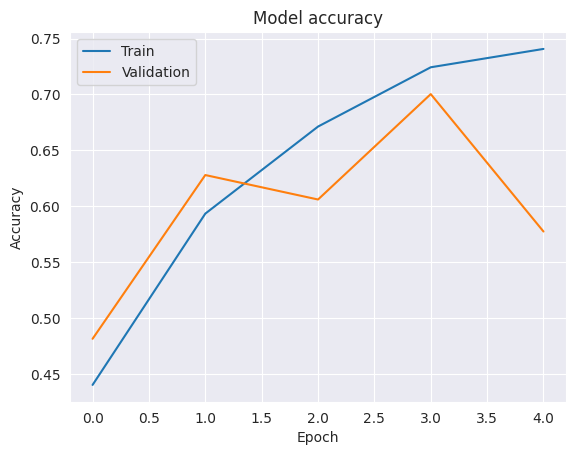

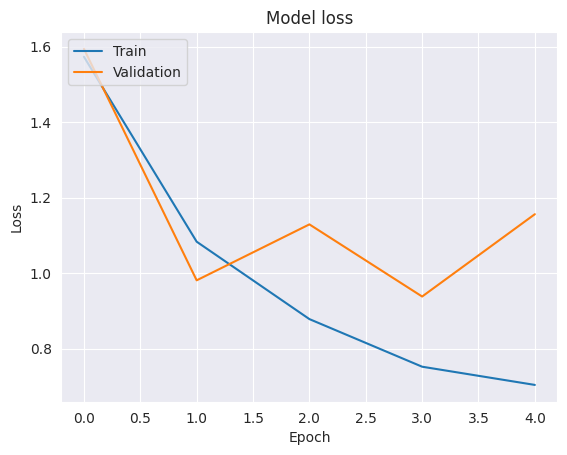

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step


In [35]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       119
           1       0.82      0.34      0.49       119
           2       0.56      0.65      0.60       119
           3       0.70      0.87      0.78       119
           4       0.78      0.86      0.82       118

    accuracy                           0.70       594
   macro avg       0.72      0.70      0.69       594
weighted avg       0.72      0.70      0.69       594



In [36]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

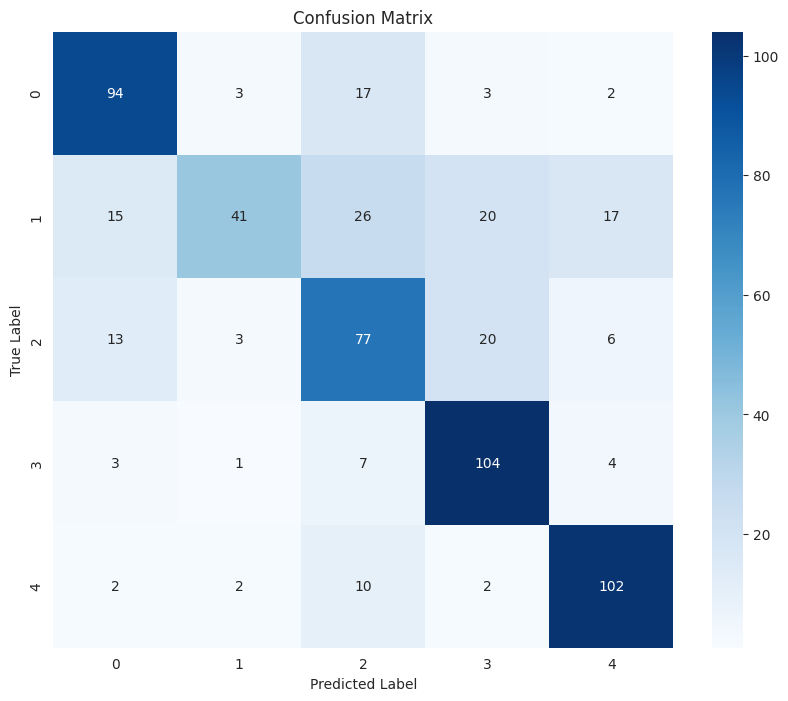

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730785189.268263     461 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 1300 bytes spill stores, 1284 bytes spill loads



297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3627 - loss: 1.7807

I0000 00:00:1730785232.715929     517 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot', 1300 bytes spill stores, 1284 bytes spill loads



297/297 ━━━━━━━━━━━━━━━━━━━━ 63s 120ms/step - accuracy: 0.3629 - loss: 1.7799 - val_accuracy: 0.4613 - val_loss: 1.3085
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.5684 - loss: 1.1239 - val_accuracy: 0.6397 - val_loss: 1.0026
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.6706 - loss: 0.8886 - val_accuracy: 0.6835 - val_loss: 0.9202
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.7214 - loss: 0.7402 - val_accuracy: 0.7037 - val_loss: 0.8452
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.7932 - loss: 0.5697 - val_accuracy: 0.7727 - val_loss: 0.8256


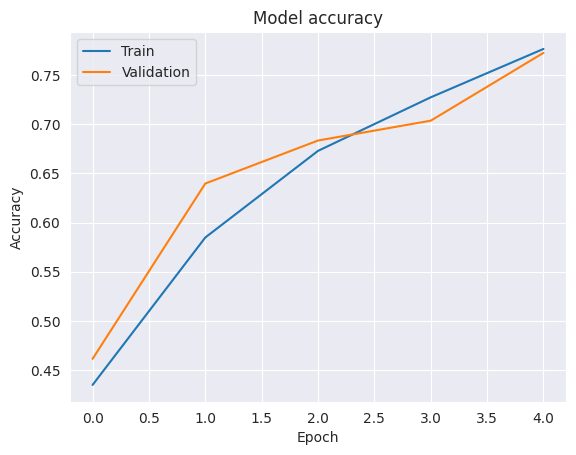

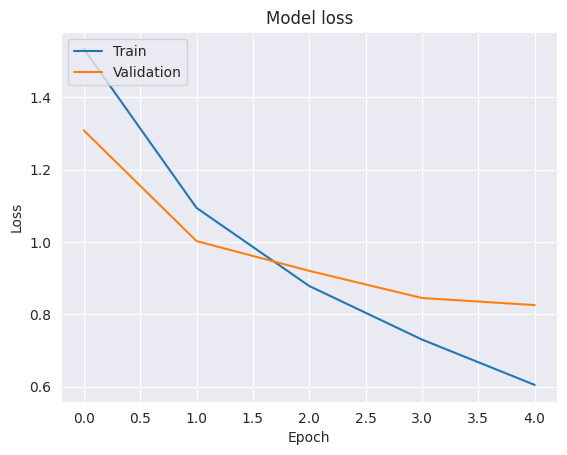

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step


In [42]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       119
           1       0.81      0.63      0.71       119
           2       0.76      0.40      0.53       119
           3       0.73      0.89      0.80       119
           4       0.76      0.92      0.83       118

    accuracy                           0.75       594
   macro avg       0.76      0.75      0.74       594
weighted avg       0.76      0.75      0.74       594



In [43]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

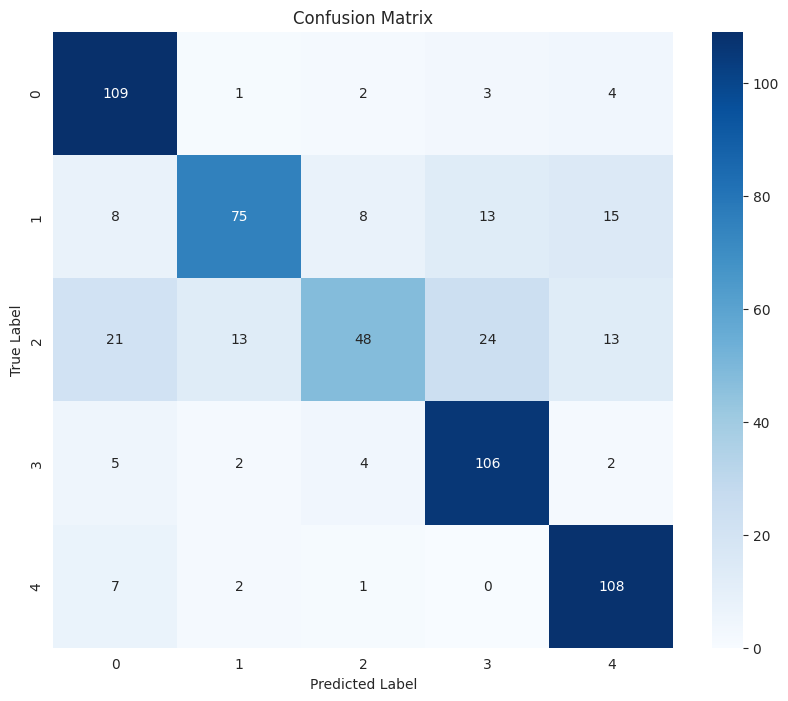

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_mobilenet_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [46]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1730786504.203916     633 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_13', 1296 bytes spill stores, 1280 bytes spill loads

I0000 00:00:1730786508.729554     631 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_14', 2024 bytes spill stores, 2016 bytes spill loads



296/297 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3815 - loss: 1.7546

I0000 00:00:1730786544.540544     697 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4', 1296 bytes spill stores, 1280 bytes spill loads



297/297 ━━━━━━━━━━━━━━━━━━━━ 57s 99ms/step - accuracy: 0.3820 - loss: 1.7530 - val_accuracy: 0.5791 - val_loss: 1.1248
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6515 - loss: 0.9451 - val_accuracy: 0.7054 - val_loss: 0.8337
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.7451 - loss: 0.7116 - val_accuracy: 0.7441 - val_loss: 0.7360
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.7964 - loss: 0.5539 - val_accuracy: 0.7626 - val_loss: 0.6817
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.8336 - loss: 0.4698 - val_accuracy: 0.7862 - val_loss: 0.6341


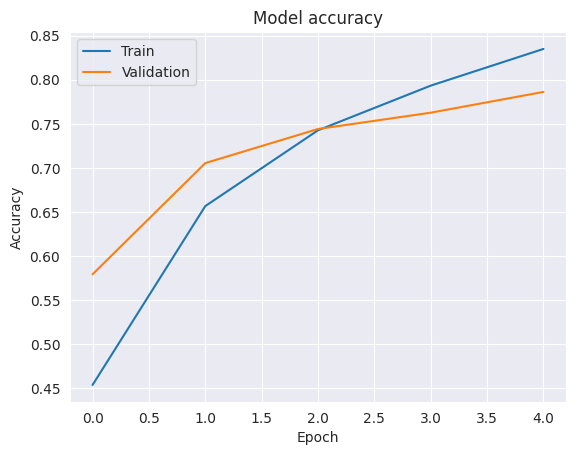

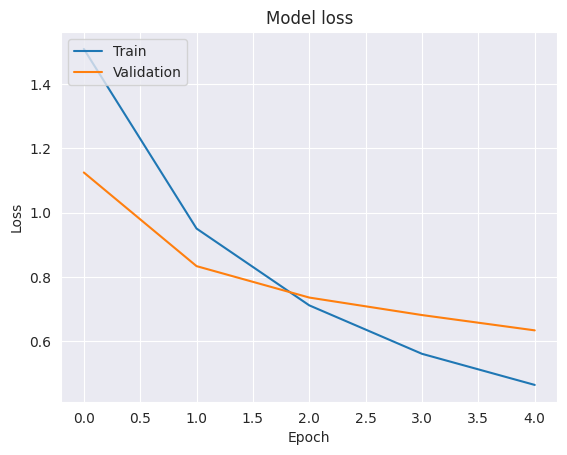

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [48]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step


In [49]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       119
           1       0.86      0.66      0.75       119
           2       0.69      0.65      0.67       119
           3       0.87      0.87      0.87       119
           4       0.83      0.97      0.90       118

    accuracy                           0.81       594
   macro avg       0.81      0.81      0.80       594
weighted avg       0.81      0.81      0.80       594



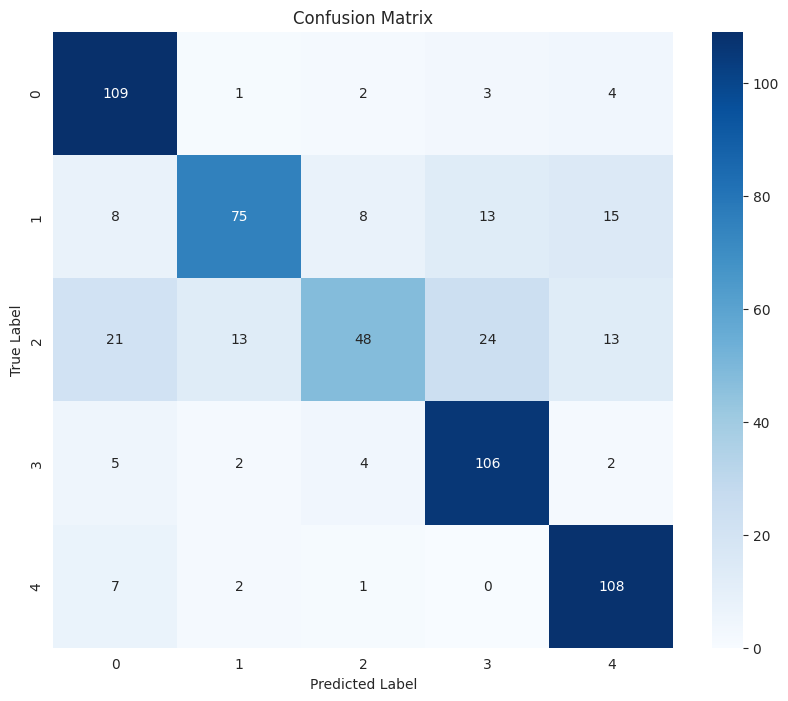

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

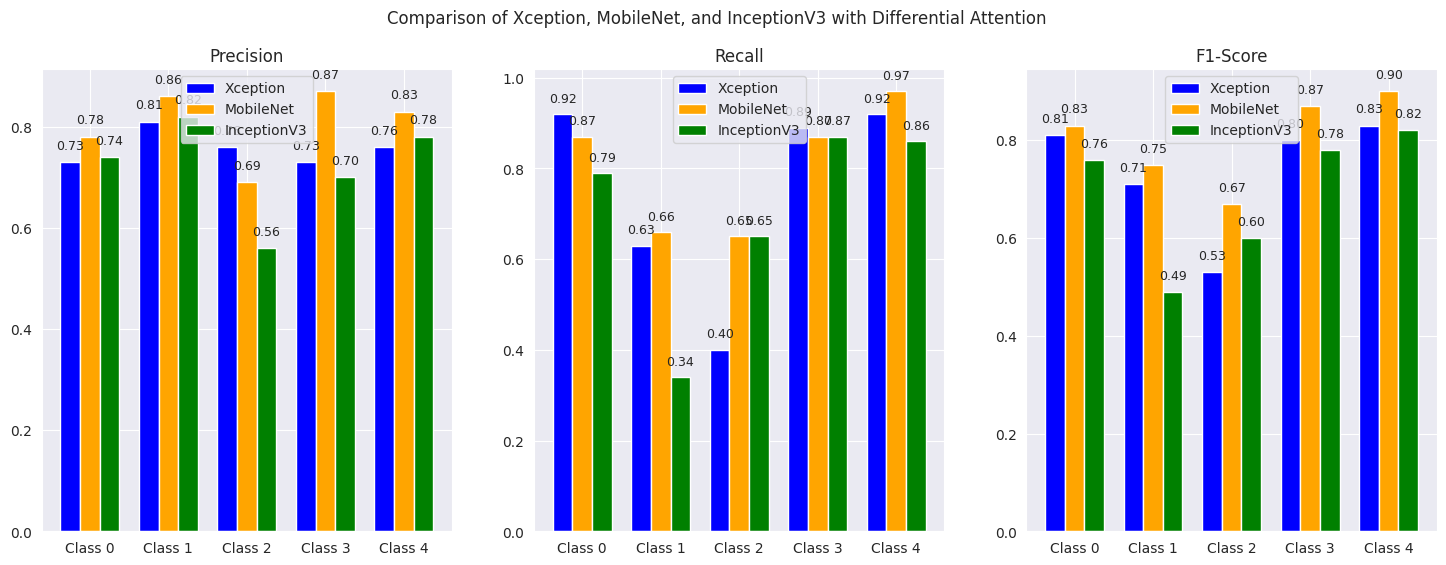

In [53]:
xception_metrics = {
    "precision": [0.73, 0.81, 0.76, 0.73, 0.76],
    "recall": [0.92, 0.63, 0.40, 0.89, 0.92],
    "f1-score": [0.81, 0.71, 0.53, 0.80, 0.83]
}

mobilenet_metrics = {
    "precision": [0.78, 0.86, 0.69, 0.87, 0.83],
    "recall": [0.87, 0.66, 0.65, 0.87, 0.97],
    "f1-score": [0.83, 0.75, 0.67, 0.87, 0.90]
}

inceptionv3_metrics = {
    "precision": [0.74, 0.82, 0.56, 0.70, 0.78],
    "recall": [0.79, 0.34, 0.65, 0.87, 0.86],
    "f1-score": [0.76, 0.49, 0.60, 0.78, 0.82]
}

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

bar_width = 0.25
x = np.arange(len(classes))

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparison of Xception, MobileNet, and InceptionV3 with Differential Attention")

def add_annotations(ax, data, x_positions):
    for i, v in enumerate(data):
        ax.text(x_positions[i], v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

axs[0].bar(x - bar_width, xception_metrics["precision"], width=bar_width, label="Xception", color='blue')
axs[0].bar(x, mobilenet_metrics["precision"], width=bar_width, label="MobileNet", color='orange')
axs[0].bar(x + bar_width, inceptionv3_metrics["precision"], width=bar_width, label="InceptionV3", color='green')
axs[0].set_title("Precision")
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes)
add_annotations(axs[0], xception_metrics["precision"], x - bar_width)
add_annotations(axs[0], mobilenet_metrics["precision"], x)
add_annotations(axs[0], inceptionv3_metrics["precision"], x + bar_width)
axs[0].legend()

axs[1].bar(x - bar_width, xception_metrics["recall"], width=bar_width, label="Xception", color='blue')
axs[1].bar(x, mobilenet_metrics["recall"], width=bar_width, label="MobileNet", color='orange')
axs[1].bar(x + bar_width, inceptionv3_metrics["recall"], width=bar_width, label="InceptionV3", color='green')
axs[1].set_title("Recall")
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes)
add_annotations(axs[1], xception_metrics["recall"], x - bar_width)
add_annotations(axs[1], mobilenet_metrics["recall"], x)
add_annotations(axs[1], inceptionv3_metrics["recall"], x + bar_width)
axs[1].legend()

axs[2].bar(x - bar_width, xception_metrics["f1-score"], width=bar_width, label="Xception", color='blue')
axs[2].bar(x, mobilenet_metrics["f1-score"], width=bar_width, label="MobileNet", color='orange')
axs[2].bar(x + bar_width, inceptionv3_metrics["f1-score"], width=bar_width, label="InceptionV3", color='green')
axs[2].set_title("F1-Score")
axs[2].set_xticks(x)
axs[2].set_xticklabels(classes)
add_annotations(axs[2], xception_metrics["f1-score"], x - bar_width)
add_annotations(axs[2], mobilenet_metrics["f1-score"], x)
add_annotations(axs[2], inceptionv3_metrics["f1-score"], x + bar_width)
axs[2].legend()

plt.show()

Copyright @ThinkAI - A machine Learning Community (Thanks !!!)